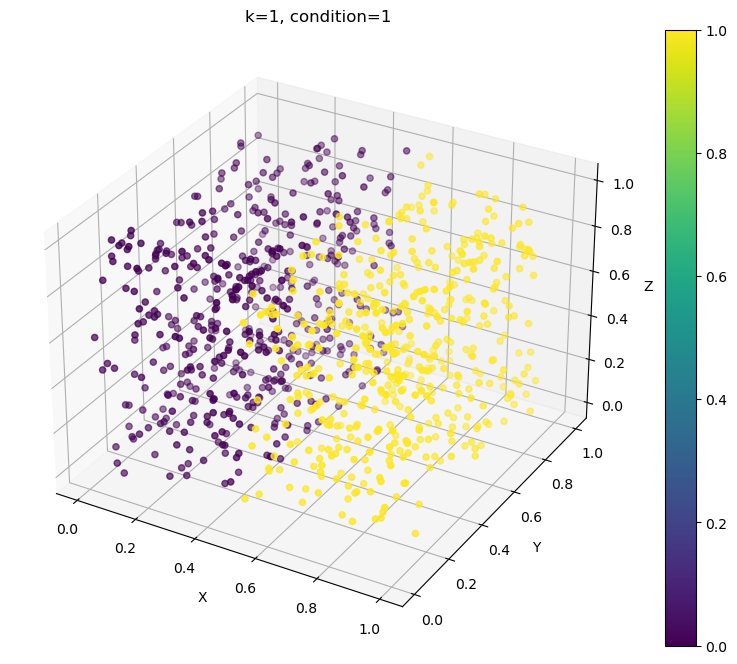

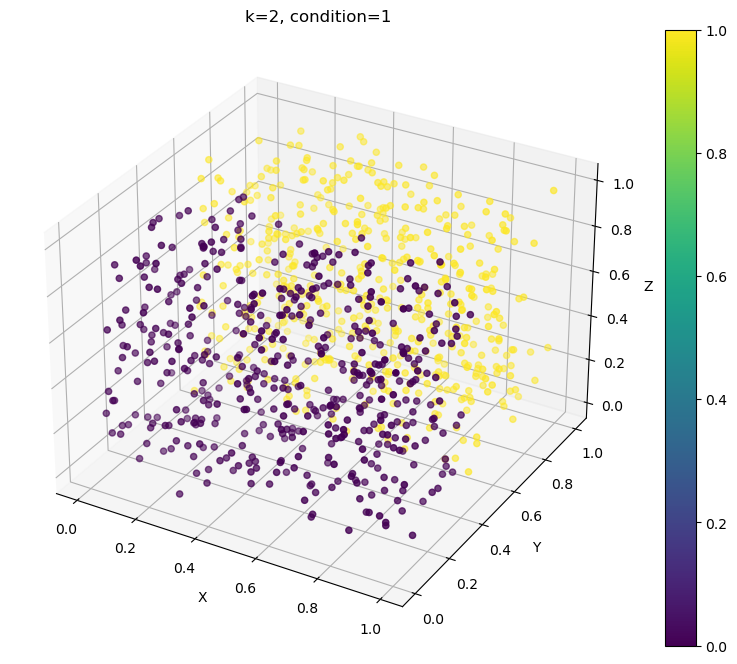

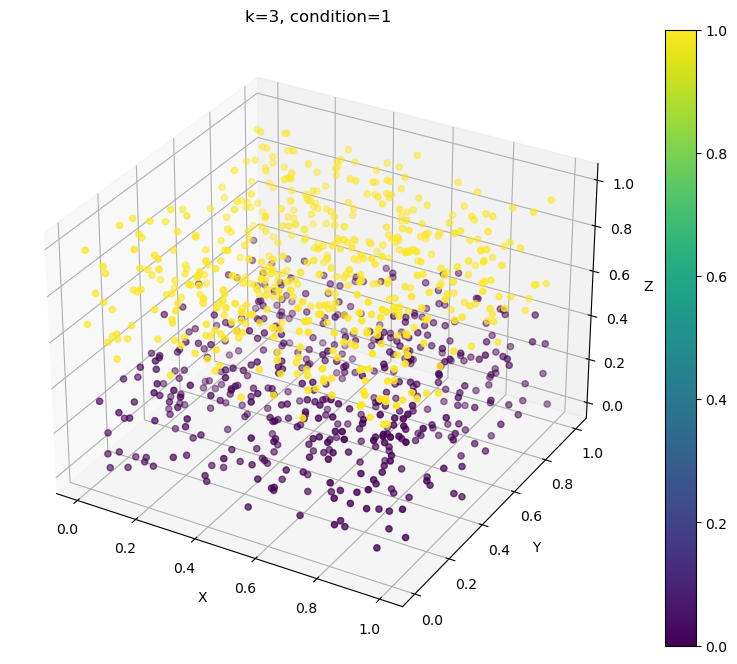

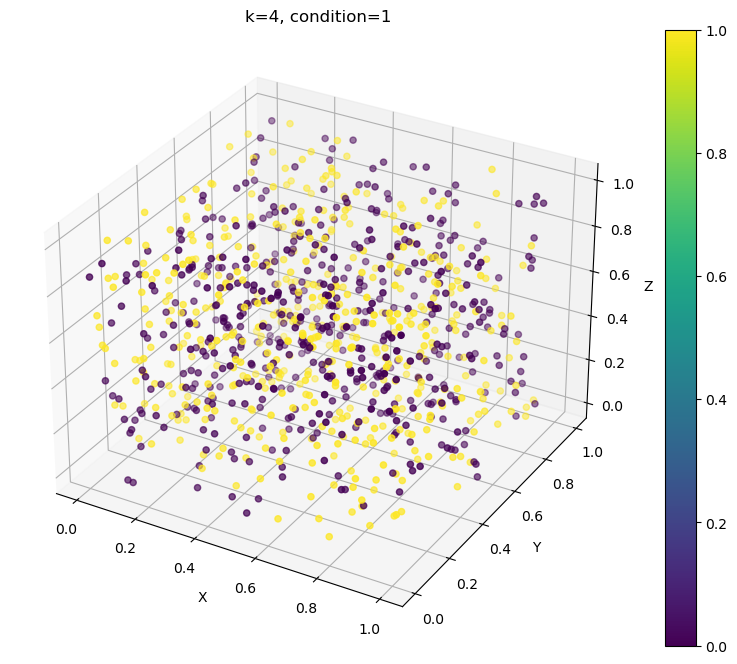

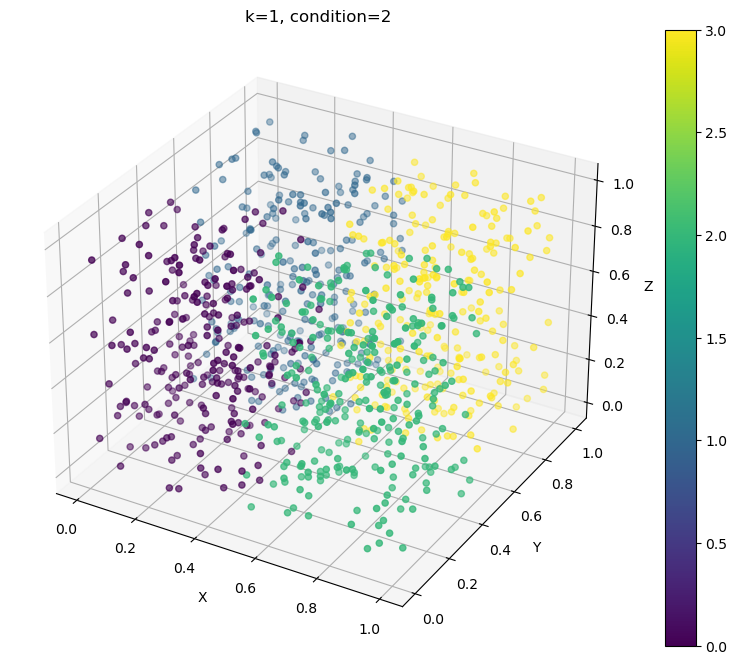

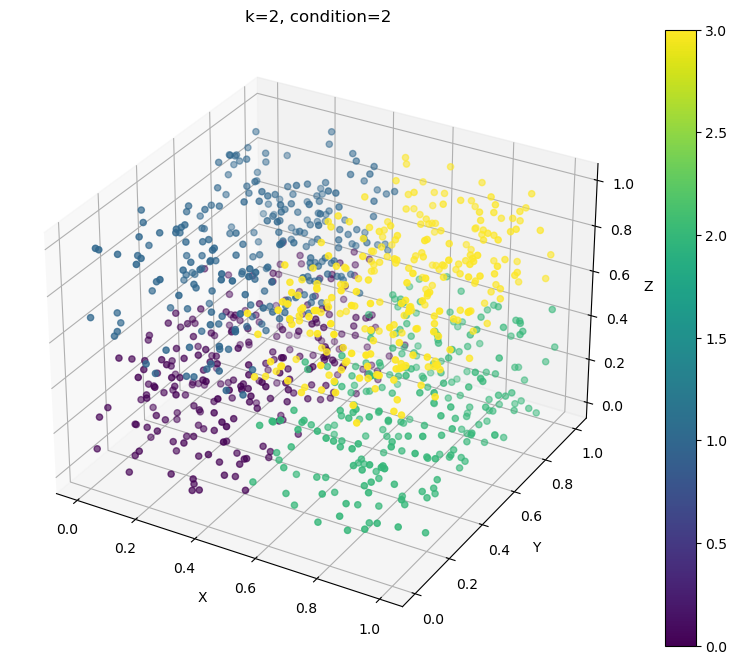

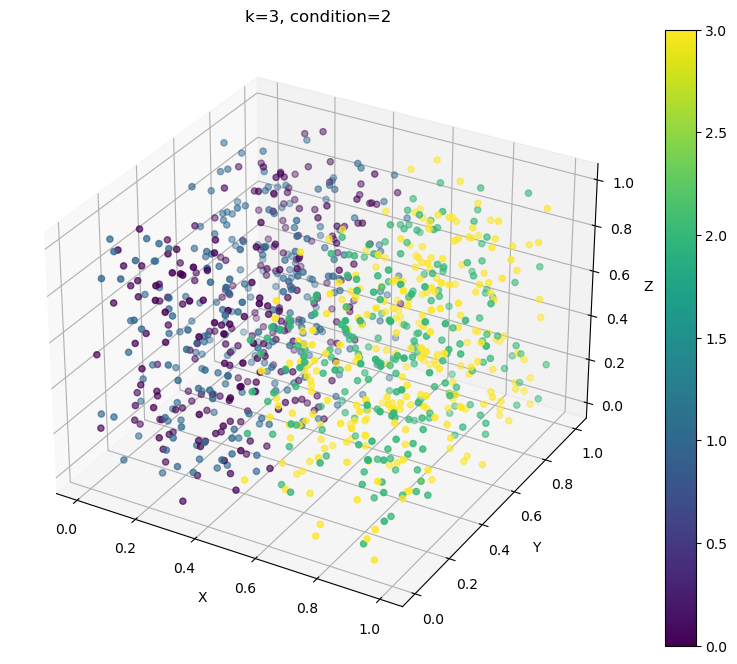

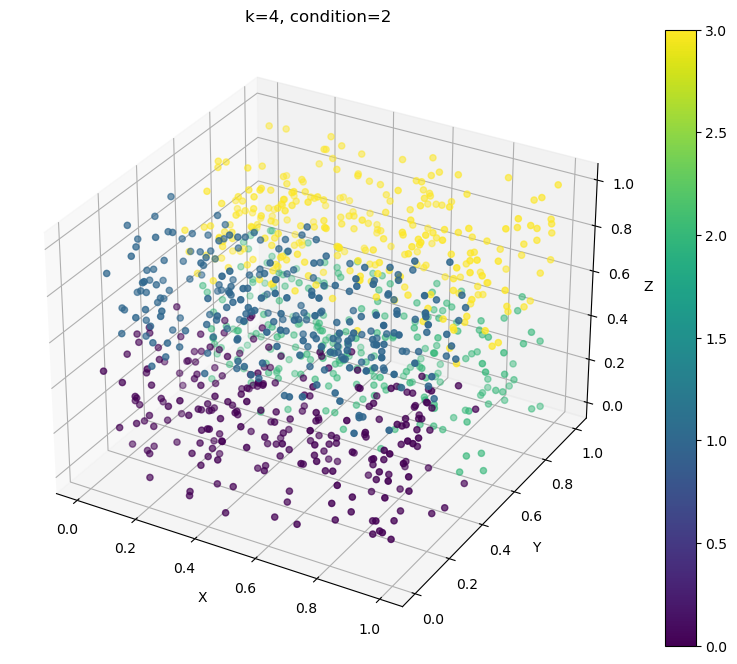

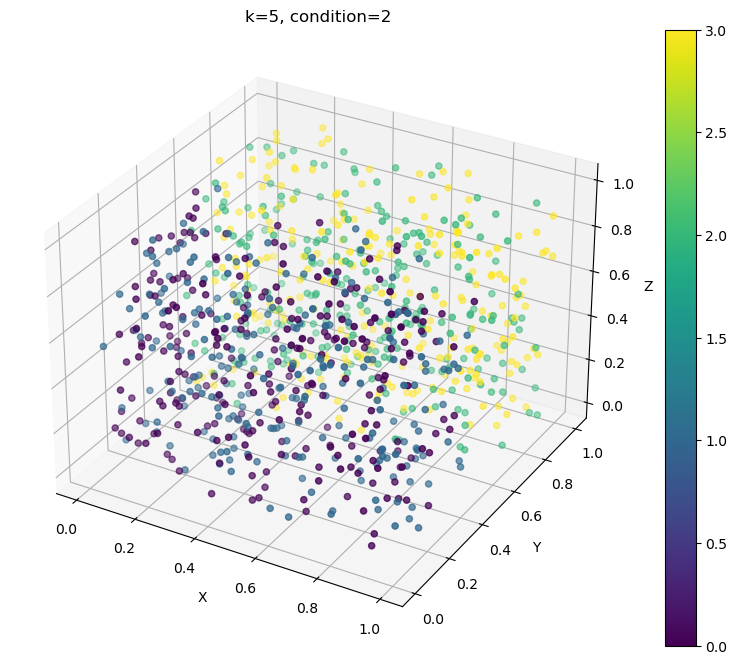

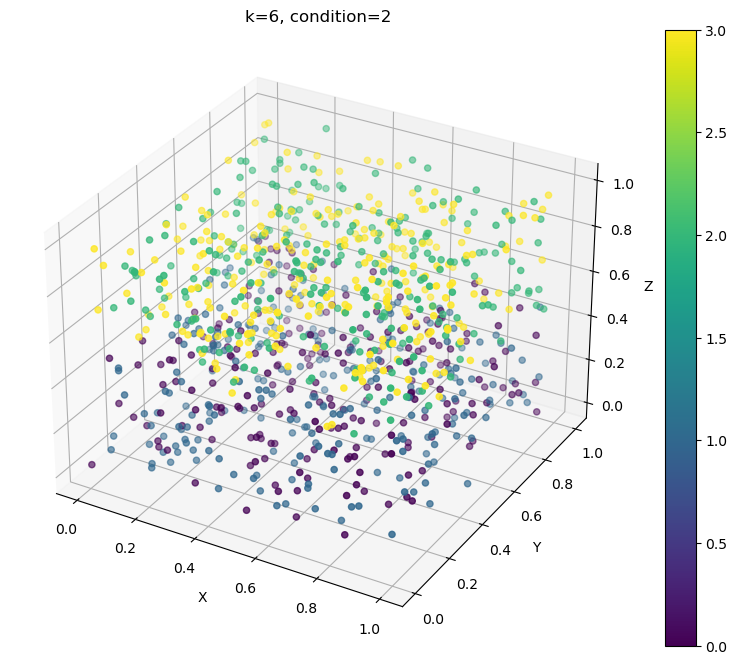

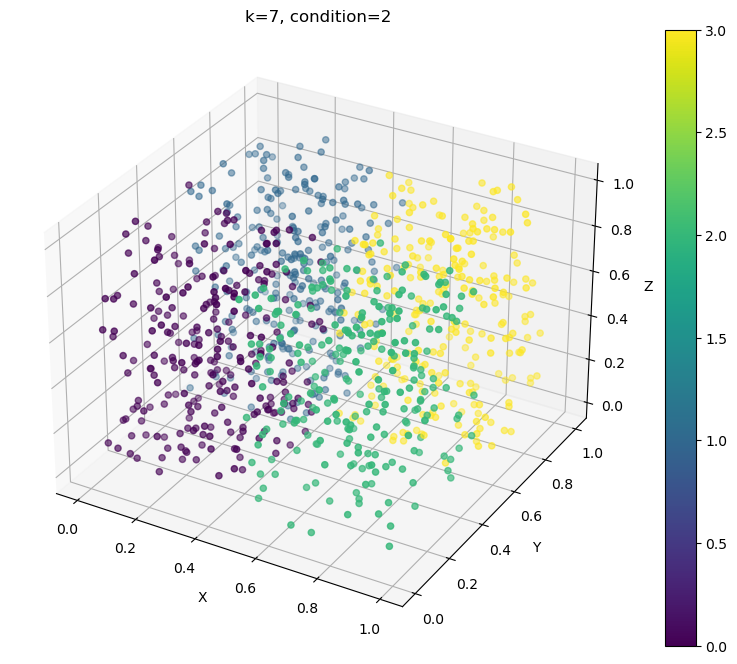

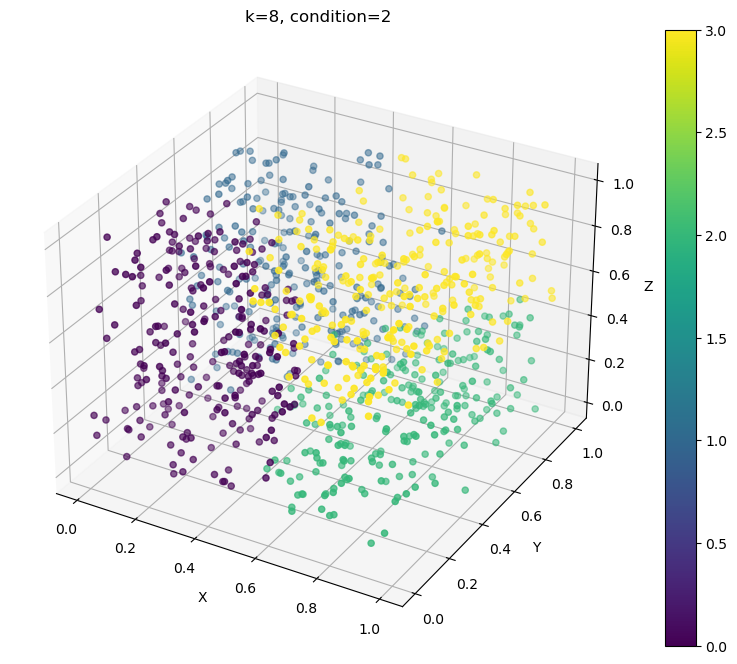

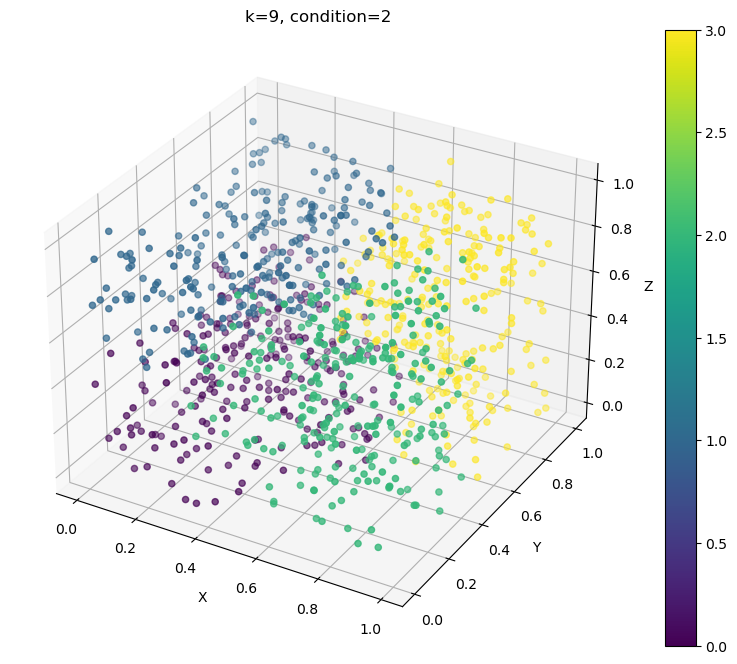

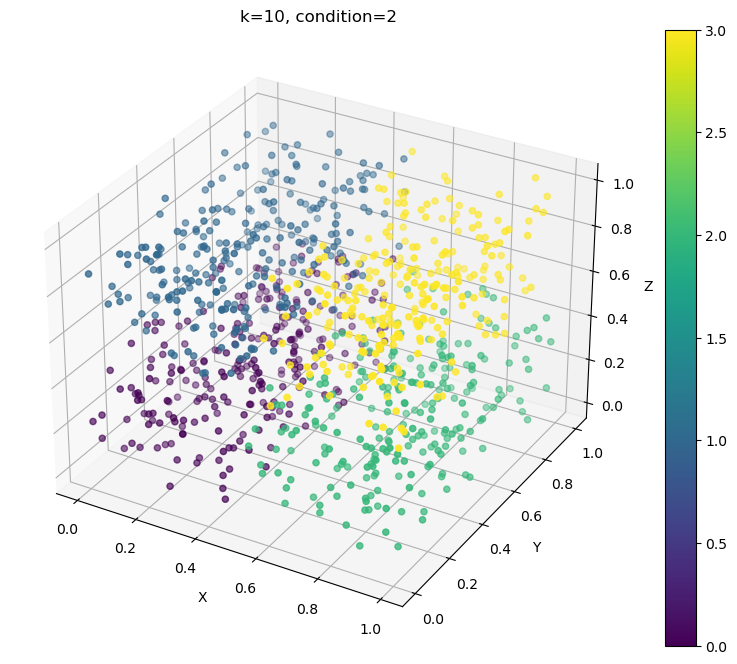

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_centers(m, n1, n2):
    centers = []
    for i in range(2):
        center = [0.5] * 4
        center[m] = 0.25 + 0.5 * i
        if i == 0:
            for j in range(2):
                new_center = center.copy()
                new_center[n1] = 0.25 + 0.5 * j
                centers.append(tuple(new_center))
        else:
            for k in range(2):
                new_center = center.copy()
                new_center[n2] = 0.25 + 0.5 * k
                centers.append(tuple(new_center))
    return tuple(centers)

def get_centers(k, condition):
    if condition == 1:
        return tuple(generate_centers(k-1, k-1, k-1)[:2])
    else:
        if k <= 6:  # 两个超平面分割
            dims = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
            return generate_centers(dims[k-1][0], dims[k-1][1], dims[k-1][1])
        else:  # 三个超平面分割
            m = (k - 7) // 6
            n1 = ((k - 7) % 6) // 2
            n2 = ((k - 7) % 6) % 2
            dims = [i for i in range(4) if i != m]
            return generate_centers(m, dims[n1], dims[n2])

def generate_data(n_samples, k, condition):
    centers = get_centers(k, condition)
    n_centers = len(centers)
    
    X = np.random.rand(n_samples, 4)
    y = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        distances = [np.linalg.norm(X[i] - center) for center in centers]
        y[i] = np.argmin(distances)
    
    return X, y

def plot_3d(X, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    plt.colorbar(scatter)
    plt.show()

# 主程序
n_samples = 1000

# 测试不同的 k 和 condition 组合
test_cases = [
    (1, 1), (2, 1), (3, 1), (4, 1),
    (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2),
    (7, 2), (8, 2), (9, 2), (10, 2)
]

for k, condition in test_cases:
    X, y = generate_data(n_samples, k, condition)
    plot_3d(X, y, f'k={k}, condition={condition}')
